## ANALIZA PODATKOV

In [87]:
import pandas as pd
import matplotlib.pyplot as plt


hribi = pd.read_csv('obdelani_podatki/hribi.csv')

In [88]:
hribi

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis,blok_poti
0,Snežnik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1796,"vrh, koča",851397,99,12,Snežnik oz. Veliki Snežnik je z višino 1796 m ...,NaN
1,Mali Snežnik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1694,vrh,431337,83,4,Mali Snežnik je vrh na zahodnem grebenu Snežni...,NaN
2,Mali Golak,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1495,vrh,637569,97,5,Mali Golak je najvišji od Golakov. Imena ni do...,NaN
3,Srednji Golak,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1480,vrh,399136,79,3,Srednji Golak se nahaja med Malim in Velikim G...,NaN
4,Mrzovec,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",1410,vrh,414632,81,5,Mrzovec je najizrazitejši vrh v osrčju Trnovsk...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2188,Blaguško jezero,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",220,jezero,749,16,2,"Blaguško jezero je jezero umetnega nastanka, k...",NaN
2189,Lisjakova struga,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",206,koča,170,7,1,"Lisjakova struga je bil nekoč rokav reke Mure,...",NaN
2190,Babičev mlin na Muri,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",182,NaN,1453,21,2,Babičev mlin na Muri se nahaja le kakih 100 me...,NaN
2191,Brod na Muri (Melinci),Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",175,NaN,196546,55,1,"Brod v Melincih je eden od štirih brodov, ki š...",NaN


Bloka poti v tabeli **hribi** ne potrebujemo več, saj imamo ločeno tabelo s potmi, v kateri je za vsako pot naveden tudi vrh.

In [105]:
del hribi['blok_poti']

In [3]:
poti = pd.read_csv('obdelani_podatki/poti.csv')
poti

,ime_poti,cas_poti,tezavnost_poti,vrh
0,Sviščaki - Snežnik (peš pot),120,lahka označena pot,Snežnik
1,Kapetanova bajta - Snežnik,55,lahka označena pot,Snežnik
2,Leskova dolina - Snežnik,195,lahka označena pot,Snežnik
3,Snežniška Grda jama - Snežnik (čez Mali Snežnik),85,lahka označena pot,Snežnik
4,Gašperjev hrib - Snežnik,90,lahka označena pot,Snežnik
...,...,...,...,...
6959,Veržej - Babičev mlin na Muri,20,lahka označena pot,Babičev mlin na Muri
6960,Beltinci - Babičev mlin na Muri,95,lahka označena pot,Babičev mlin na Muri
6961,Mota - Brod na Muri (Melinci) (od mrtvic do reke),45,lahka označena pot,Brod na Muri (Melinci)
6962,Razkrižje - Razkriški kot (sotočje Mure in Šča...,75,lahka označena pot,Razkriški kot (sotočje Mure in Ščavnice)


In [4]:
st_hribov = hribi['ime'].count()
st_hribov

2193

Iz spletne strani hribi.net smo zajeli 2193 elementov. Od tega niso vsi vrhovi gora in hribov, temveč so zajeta tudi različna jezera, koče in druge postojanke, do katerih vodijo označene in neoznačene poti.

In [5]:
st_vseh_poti = poti['ime_poti'].count()
st_vseh_poti

6964

Vseh različnih poti do prej omenjenih točk, smo zajeli 6964. Za vsako imamo poleg imena, ki v večini primerov vsebuje tudi podatek o izhodišču in cilju, še čas hoje, težavnost poti in dodaten podatek o vrhu (ta je bil dodan za vsak primer, če ne bi bil viden že v imenu).

# PRILJUBLJENOST VRHOV

Za začetek iz tabele **hribi** izločimo samo vrhove in analizirajmo njihovo priljubljenost.

In [118]:
tabela_vrhov = hribi[hribi.vrsta >= 'vrh']
vrhovi_po_priljubljenosti = tabela_vrhov.sort_values(['priljubljenost', 'stevilo_ogledov'], ascending=[False, False])
vrhovi_po_priljubljenosti

,ime,drzava,drzava_2,drzava_3,gorovje,visina,vrsta,stevilo_ogledov,priljubljenost,stevilo_poti,opis
293,Triglav,Slovenija,NaN,NaN,Julijske Alpe,2864,"vrh, bivak",1523369,100,28,"Triglav je 2864 m visoka gora, ki se nahaja v ..."
859,Grintovec,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2558,vrh,1087790,100,14,Grintovec je najvišji vrh Kamniških in Savinjs...
877,Storžič,Slovenija,NaN,NaN,Kamniško Savinjske Alpe,2132,vrh,1062658,100,30,"Storžič je 2132 m visoka gora, ki se nahaja na..."
1141,Stol,Avstrija,NaN,Slovenija,Karavanke,2236,vrh,1060769,100,20,Stol je z višino 2236 m najvišji vrh Karavank....
1157,Begunjščica,Slovenija,NaN,NaN,Karavanke,2060,vrh,963090,100,14,Begunjščica je pogorje v Karavankah vzhodno od...
...,...,...,...,...,...,...,...,...,...,...,...
2172,Ostragova,Slovenija,NaN,NaN,"Strojna, Košenjak, Kozjak in Slovenske gorice",309,vrh,49,2,1,Ostragova je hrib nad naseljem Drbetinci in je...
1490,Goležev grad,Slovenija,NaN,NaN,Karavanke,505,vrh,37,2,2,Stari vitanjski grad oz. Goležev grad se nahaj...
176,Mali Mošenik,Slovenija,NaN,NaN,"Goriško, Notranjsko in Snežniško hribovje",700,vrh,36,2,1,"Mali Mošenik je razgledni vrh, ki se pne na me..."
1583,Sveti Martin (Zlakova),Slovenija,NaN,NaN,"Pohorje, Dravinjske gorice in Haloze",589,"vrh, cerkev",29,2,1,Cerkev sv. Martina se nahaja na razgledni vzpe...


In [122]:
tabela_vrhov.count()

ime                1322
drzava             1322
drzava_2              2
drzava_3             81
gorovje            1322
visina             1322
vrsta              1322
stevilo_ogledov    1322
priljubljenost     1322
stevilo_poti       1322
opis               1322
dtype: int64

Vidimo, da imamo vrhov vsega skupaj 1322. 

# Koliko let bi človek potreboval, da bi osvojil vse te vrhove?

Če štejemo, da osvojimo en vrh na dan, vsak dan v letu, bi potrebovali zgolj slabe 4 leta. Vendar pa takšna situacija ni realna. Poskusimo najdi bolj realen rezultat, vendar še vedno poenostavljen. 


Recimo, da **človek hodi v službo** 5 dni v tednu, vikende ima proste. Ostane nam približno **100 dni**. 

Če upoštevamo še **vreme**, saj v slabem vremenu ne hodimo v hribe, vzamemo cca 150 deževnih dni na leto (zgornja meja), torej **215 lepih dni**. Kolikšna je verjetnost, da bodo vsi slabi dnevi ravno med vikendom?


Slabih dni je torej največ 40 %. Koliko od teh deževnih dni je med vikendom, ko imamo čas, da gremo v hribe? Recimo, da se deževni dnevi razporedijo **enakomerno čez leto**, ne glede na letni čas. Potem so približno **3 dnevi na teden deževni**. Verjetnost, da bo cel vikend dež je potem dobre 15%, verjetnost, da bo en dan v vikendu slab in eden dober pa 55%. Oba dneva bosta lepa v slabih 30%. Rešimo ta problem tako, da rečemo, da bomo v primeru slabega vremena cel vikend šli v službo za vikend in vzeli dopust med tednom (ker smo matematiki in nam delodajalec to z veseljem ponudi). Torej bomo v** 45% hodili dva dneva na teden, v ostalih 55% pa le en dan** za vikend. Vse skupaj imamo sedaj približno** 70 dni** za hojo na leto.


To so sedaj seveda še preveč idealni pogoji, pa vendar smo sedaj na približno **19 letih**. To število lahko nekoliko zmanjšamo, saj vemo, da lahko v eni turi oz. v enem dnevu osvojiš več vrhov, še posebej kadar so blizu skupaj, kot npr. Slemenova špica, Mala Mojstrovka, Velika Mojstrovka in Zadnja Mojstrovka. Pa vendar, da ne bomo precenjevali svojih zmožnosti, recimo, da osvojimo **dva vrhova na dan** (enkrat več, drugič manj). Zdaj smo na **9,5 let**. Če pa prištejemo še dejstvo, da si ob prevelikih naporih in tako veliki frekvenci hoje v hribe hitro poškoduješ, saj vendrale ni vedno povsem varno, pa lahko ta čas še nekoliko podaljšamo. Recimo, da si na sestopu iz Male Mojtrovke na koncu melišča **zlomimo gleženj**. Gleženj imamo imobiliziran približno en mesec, potem pa si ne želimo prehitro vrniti v pohodne čevlje, saj se mora počasi in postopoma utrditi nazaj. Pa smo že **zamudili 15 lepih pohodnih dni**. Če smo optimisti. 


Večkrat v letu imamo med vikendom tudi druge obveznosti, kot so **tamburaški koncerti in vaje**, pa recimo, da nam to vzame **20 dni v letu** (še vedno štejemo zgolj vikende). Pa še **petino vikendov** se namesto v hribe odpravimo v plezališče, to je še približno **15 dni**. Ker se ne bomo poškodovali vsako leto, si povprečno vzemimo recimo **2 dneva na leto za bolniško**. Vmes si namreč dovolimo preboleti tudi kakšen prehlad. 


Pa poglejmo. Sedaj smo s **kulturo, bolniško in plezarijo** izbgubili približno **37 dni na leto**. Lepih dni, med vikendom. Morda pa bo kakšen od teh dni za kulturo slab... pa zaokrožimo potem na **34**. Ostane nam **36 pohodniških dni na leto. Dva vrhova na turo. To je dobrih 18 let.** Pa smo skoraj nazaj na prvotnem rezultatu.


Poleg tega nismo razlikovali zimskih in letnih tur. Obvezna je torej tudi zimska oprema za naš rezultat.


Naj opozorim, da tukaj štejemo le vrhove, ne pa tudi vseh poti in smeri. Tisto pa je že druga zgodba. Slovenija vendarle ni tako majhna... Himalaja bo še malo počakala. Pa pot pod noge :D ;).

<AxesSubplot: xlabel='priljubljenost', ylabel='stevilo_ogledov'>

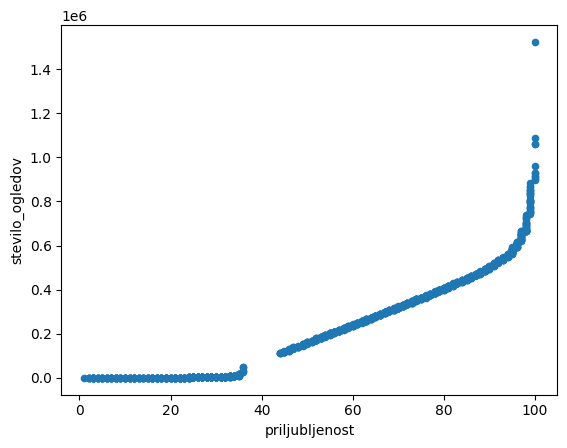

In [120]:
vrhovi_po_priljubljenosti.plot(kind='scatter', y ='stevilo_ogledov', x = 'priljubljenost')

V zgornjem grafu vidimo pričakovan rezultat. Večja kot je priljubljenost, večje je tudi število ogledov. Vendar pa graf ni linearen. Zakaj?
Poglejmo, če je priljubljenost kakorkoli povezana z gorovjem.

In [121]:
tabela_vrhov.groupby('gorovje')['ime'].count().sort_values()

gorovje
Prekmurje                                         34
Strojna, Košenjak, Kozjak in Slovenske gorice     42
Pohorje, Dravinjske gorice in Haloze              46
Polhograjsko hribovje in Ljubljana                64
Škofjeloško, Cerkljansko hribovje in Jelovica     82
Kamniško Savinjske Alpe                          146
Posavsko hribovje in Dolenjska                   169
Karavanke                                        207
Goriško, Notranjsko in Snežniško hribovje        208
Julijske Alpe                                    324
Name: ime, dtype: int64

In [111]:
povprečne_vrednosti_po_gorovjih = hribi.groupby('gorovje').mean()
povprečne_vrednosti_po_gorovjih.sort_values(['priljubljenost', 'stevilo_ogledov'], ascending=[False, False])

C:\Users\FMF\AppData\Local\Temp\ipykernel_24552\2463658646.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  povprečne_vrednosti_po_gorovjih = hribi.groupby('gorovje').mean()


,visina,stevilo_ogledov,priljubljenost,stevilo_poti
gorovje,,,,
Kamniško Savinjske Alpe,1373.656028,350052.719858,68.843972,4.134752
Julijske Alpe,1646.496466,334427.902827,68.116608,2.770318
Polhograjsko hribovje in Ljubljana,629.505618,272155.213483,60.831461,3.977528
"Goriško, Notranjsko in Snežniško hribovje",771.604096,236492.126280,57.010239,2.778157
Karavanke,1304.564738,234840.479339,54.374656,3.217631
Posavsko hribovje in Dolenjska,674.278261,208399.426087,51.878261,3.086957
"Škofjeloško, Cerkljansko hribovje in Jelovica",954.187500,207097.361111,51.409722,4.263889
"Pohorje, Dravinjske gorice in Haloze",921.625000,151035.791667,37.625000,3.083333
"Strojna, Košenjak, Kozjak in Slovenske gorice",597.133333,78549.973333,27.866667,2.853333


Glede na povprečno priljubljenost lahko ocenimo, da so najbolj priljubljene Kamniško Savinjske Alpe in Julijske Alpe. Najmanj je priljubljeno Prekmurje. Na prvi pogled izgleda, da povprečno število poti in povprečna višina na priljubljenost ne vplivata. Prav tako, če pogledamo število elementov v posameznih gorovjih v zgornji tabeli, vidimo, da priljubljenost ne narašča nujno s številom vrhov v gorovju.